Source: https://www.kaggle.com/roshansharma/market-basket-analysis

# Apriori Algorithm (Replicated from Kaggle)

In [22]:
# libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import squarify

# showing items in directory
import os
print(os.listdir('./data/'))

# mute warnings
import warnings
warnings.filterwarnings(action = 'ignore')

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

['kaggle-survey-2019', 'Market_Basket_Optimisation.csv', 'seoul_municipalities_geo_simple.json', '상가업소정보_201912_01 (1).csv', '전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', '주택도시보증공사_전국 평균 분양가격(2019년 12월).csv']


In [12]:
# import data
data = pd.read_csv('./data/Market_Basket_Optimisation.csv', header = None)
print(data.shape)
data.head()

(7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization

Text(0.5, 1.0, 'Most Popular Items')

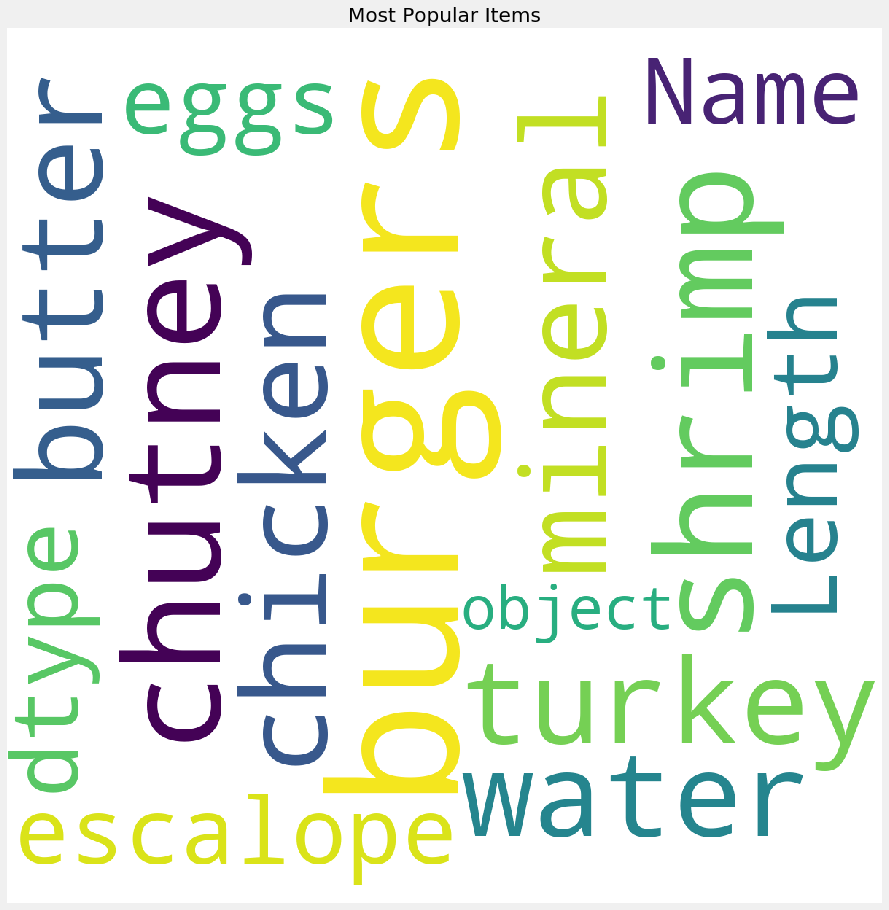

In [15]:
# word cloud
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white',
                     width = 1200, height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)

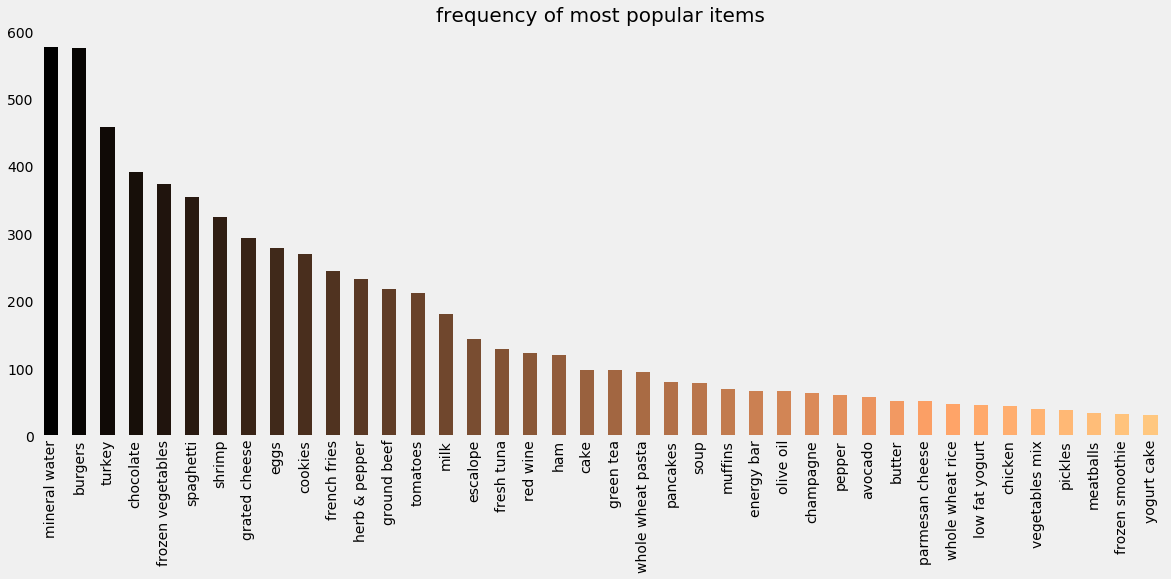

In [21]:
# frequency of most popular items
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()


In [32]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)

import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

In [38]:
np.linspace()

array([0.])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Top 15 First Choices')

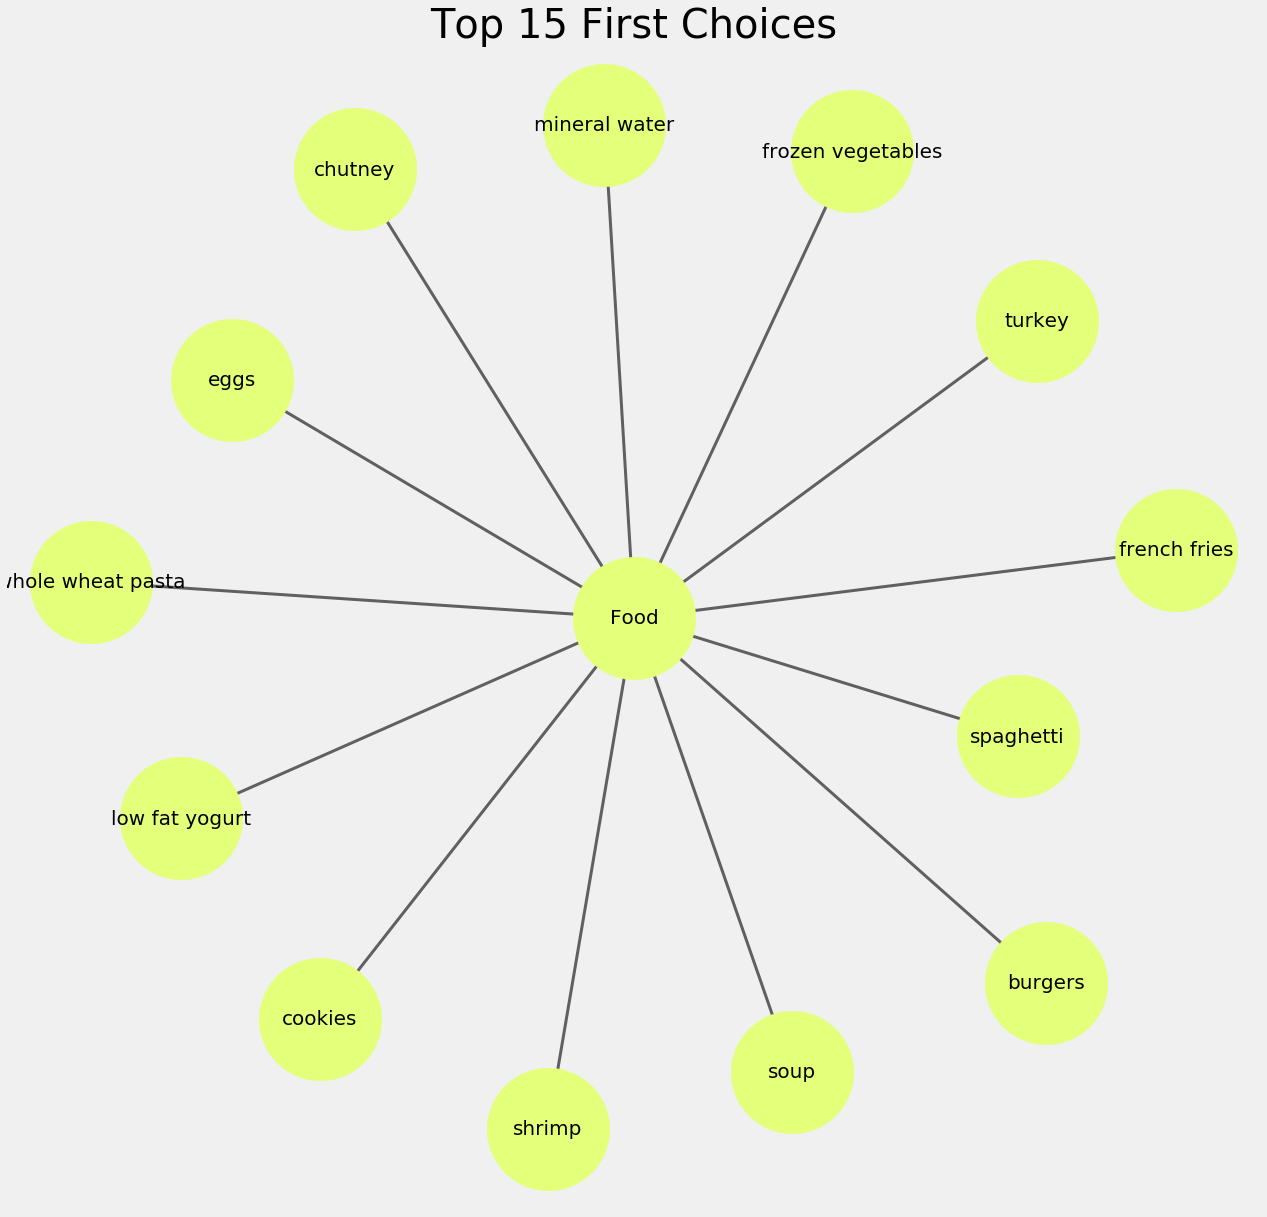

In [39]:
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food) # position
color = plt.cm.Wistia(0) # color
# np.linspace(start, end, # of items) - returns an array of evenly spaced numbers, wistia - color code

nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color) # circles
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black') # lines
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif') # labels for circles
plt.axis('off') # remove axis lines
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40) # add title
